<a href="https://colab.research.google.com/github/Dheeraj024/neural-network-bagging-/blob/main/nn_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
hyp_data = sio.loadmat("/content/drive/MyDrive/Colab Notebooks/Indian_pines_corrected.mat")
gt_data = sio.loadmat("/content/drive/MyDrive/Colab Notebooks/Indian_pines_gt.mat")

In [3]:
data = hyp_data[sorted(hyp_data.keys())[-1]]

def applyPCA(X, n_components=30, seed=1):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=n_components, whiten=True, random_state=seed)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0], X.shape[1], n_components))
    return newX


# def applyPCA(X, n_components=30, seed=1):
#     # Reshape input data to 2D array
#     X_reshape = X.reshape(-1, X.shape[2])
    
#     # Center the data
#     X_mean = np.mean(X_reshape, axis=0)
#     X_centered = X_reshape - X_mean
    
#     # Compute covariance matrix and eigenvalues/eigenvectors
#     cov = np.cov(X_centered.T)
#     eigvals, eigvecs = np.linalg.eigh(cov)
    
#     # Sort eigenvalues in decreasing order and select top n_components eigenvectors
#     eigvals_sorted = np.flip(eigvals.argsort())
#     eigvecs_sorted = eigvecs[:, eigvals_sorted[:n_components]]
    
#     # Project data onto eigenvectors
#     newX = np.dot(X_centered, eigvecs_sorted)
    
#     # Reshape projected data back to original shape
#     newX = newX.reshape(X.shape[0], X.shape[1], n_components)
    
#     return newX




In [4]:
data = applyPCA(data)
data.shape

labels = gt_data[sorted(gt_data.keys())[-1]]

print(data.shape)
print(labels.shape)

data = data.reshape(data.shape[0]*data.shape[1],data.shape[2])
data.shape

labels = labels.reshape(-1,1)
labels.shape

(145, 145, 30)
(145, 145)


(21025, 1)

In [5]:
combine = np.concatenate((data,labels),axis=1)
combine

array([[ 0.96876849,  0.4801512 ,  0.09501285, ..., -0.08308338,
        -0.3144414 ,  3.        ],
       [ 1.08206297, -0.66688618,  0.45761543, ..., -1.70082187,
         3.01117831,  3.        ],
       [ 1.11968468, -1.01852852,  0.64112087, ...,  0.83300539,
        -0.37002131,  3.        ],
       ...,
       [-1.42368833, -0.37320899,  0.52039646, ...,  0.37675531,
         1.08857678,  0.        ],
       [-1.255093  ,  0.26308297,  0.88456889, ...,  0.01608009,
        -0.01004176,  0.        ],
       [-1.26926721,  0.11428131,  0.60833014, ...,  0.53927323,
         0.54789815,  0.        ]])

In [6]:
hyp_columns = []
for i in range(data.shape[1]):
  hyp_columns.append('b'+str(i))

hyp_columns.append('labels')

df = pd.DataFrame(combine,columns = hyp_columns)
df.head()

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,b21,b22,b23,b24,b25,b26,b27,b28,b29,labels
0,0.968768,0.480151,0.095013,0.125597,-0.835529,-0.153065,0.340914,-0.808389,0.739768,-0.196726,...,-0.680243,-0.742375,0.309232,0.706960,-0.505994,0.346319,-0.390967,-0.083083,-0.314441,3.0
1,1.082063,-0.666886,0.457615,-0.932147,0.283993,-0.641161,0.513249,0.639667,-1.369898,0.276044,...,-0.074711,0.634126,0.264466,-0.794392,-0.303542,1.126113,-0.518024,-1.700822,3.011178,3.0
2,1.119685,-1.018529,0.641121,-1.340924,0.498481,-0.292635,0.437308,0.546881,1.651552,-0.565767,...,0.060651,0.936132,0.691308,-1.013655,-0.927224,0.821306,0.184328,0.833005,-0.370021,3.0
3,1.079131,-0.780896,0.465640,-0.886678,0.281052,-0.681895,0.634920,0.624044,-0.905912,0.162279,...,0.120929,0.673786,0.522048,-0.722938,-0.164347,1.201609,-0.673626,-1.598063,2.643712,3.0
4,0.969944,0.111926,-0.030070,-0.163259,-0.706674,-0.974477,1.271296,-0.917720,-0.543372,-0.199309,...,-0.232870,-0.182736,0.318033,0.060125,-0.217072,0.644748,-0.392546,0.256941,0.084382,3.0


In [7]:
hyp_columns = hyp_columns[-1:] + hyp_columns[:-1]
df = df[hyp_columns]
df.head()

,labels,b0,b1,b2,b3,b4,b5,b6,b7,b8,...,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29
0,3.0,0.968768,0.480151,0.095013,0.125597,-0.835529,-0.153065,0.340914,-0.808389,0.739768,...,0.216976,-0.680243,-0.742375,0.309232,0.706960,-0.505994,0.346319,-0.390967,-0.083083,-0.314441
1,3.0,1.082063,-0.666886,0.457615,-0.932147,0.283993,-0.641161,0.513249,0.639667,-1.369898,...,0.196222,-0.074711,0.634126,0.264466,-0.794392,-0.303542,1.126113,-0.518024,-1.700822,3.011178
2,3.0,1.119685,-1.018529,0.641121,-1.340924,0.498481,-0.292635,0.437308,0.546881,1.651552,...,-0.033171,0.060651,0.936132,0.691308,-1.013655,-0.927224,0.821306,0.184328,0.833005,-0.370021
3,3.0,1.079131,-0.780896,0.465640,-0.886678,0.281052,-0.681895,0.634920,0.624044,-0.905912,...,0.069646,0.120929,0.673786,0.522048,-0.722938,-0.164347,1.201609,-0.673626,-1.598063,2.643712
4,3.0,0.969944,0.111926,-0.030070,-0.163259,-0.706674,-0.974477,1.271296,-0.917720,-0.543372,...,0.211589,-0.232870,-0.182736,0.318033,0.060125,-0.217072,0.644748,-0.392546,0.256941,0.084382


In [8]:
class NeuralNetwork:

    # def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
    #     self.input_size = input_size
    #     self.hidden_size1 = hidden_size1
    #     self.hidden_size2 = hidden_size2
    #     self.output_size = output_size

    #     # Initialize weights and biases
    #     self.W1 = np.random.randn(self.input_size, self.hidden_size1) * 0.01
    #     self.b1 = np.zeros((1, self.hidden_size1))
    #     self.W2 = np.random.randn(self.hidden_size1, self.hidden_size2) * 0.01
    #     self.b2 = np.zeros((1, self.hidden_size2))
    #     self.W3 = np.random.randn(self.hidden_size2, self.output_size) * 0.01
    #     self.b3 = np.zeros((1, self.output_size))

    # def forward(self, X):
    #     # Forward pass
    #     self.z1 = np.dot(X, self.W1) + self.b1
    #     self.a1 = np.maximum(0, self.z1)  # ReLU activation
    #     self.z2 = np.dot(self.a1, self.W2) + self.b2
    #     self.a2 = np.maximum(0, self.z2)  # ReLU activation
    #     self.z3 = np.dot(self.a2, self.W3) + self.b3
    #     self.a3 = np.exp(self.z3 - np.max(self.z3, axis=1, keepdims=True))  # Softmax activation
    #     self.a3 /= np.sum(self.a3, axis=1, keepdims=True)
    #     return self.a3

    # def backward(self, X, y, learning_rate):
    # # Backward pass
    #   m = X.shape[0]

    #   dZ3 = self.a3
    #   dZ3[range(m), y.astype(int)] -= 1
    #   dZ3 /= m

    #   dW3 = np.dot(self.a2.T, dZ3)
    #   db3 = np.sum(dZ3, axis=0)

    #   dA2 = np.dot(dZ3, self.W3.T)
    #   dZ2 = dA2 * (self.a2 > 0)  # ReLU derivative

    #   dW2 = np.dot(self.a1.T, dZ2)
    #   db2 = np.sum(dZ2, axis=0)

    #   dA1 = np.dot(dZ2, self.W2.T)
    #   dZ1 = dA1 * (self.a1 > 0)  # ReLU derivative

    #   dW1 = np.dot(X.T, dZ1)
    #   db1 = np.sum(dZ1, axis=0)

    # # Update weights and biases
    #   self.W3 -= learning_rate * dW3
    #   self.b3 -= learning_rate * db3
    #   self.W2 -= learning_rate * dW2
    #   self.b2 -= learning_rate * db2
    #   self.W1 -= learning_rate * dW1
    #   self.b1 -= learning_rate * db1





    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))  # Softmax activation
        self.a2 /= np.sum(self.a2, axis=1, keepdims=True)
        return self.a2

    def backward(self, X, y, learning_rate):
        # Backward pass
        m = X.shape[0]

        dZ2 = self.a2
        dZ2[range(m), y.astype(int)] -= 1
        dZ2 /= m

        dW2 = np.dot(self.a1.T, dZ2)
        db2 = np.sum(dZ2, axis=0)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)  # ReLU derivative

        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0)

        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        epsilon = 1e-8
        for epoch in range(epochs):
            # Forward pass
            a2 = self.forward(X)

            # Compute loss
            loss = -np.sum(np.log(a2[range(X.shape[0]), y.astype(int)]+epsilon)) / X.shape[0]

            # Backward pass
            self.backward(X, y, learning_rate)

            # Print loss
            if (epoch+1) % 100 == 0:
              print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        # Predict class labels
        a2 = self.forward(X)
        y_pred = np.argmax(a2, axis=1)
        return y_pred


In [9]:
def sampling(tdata,val):
    len1= int(len(tdata)*val)
    t1 = tdata.sample(frac=1)
    val_data = t1.iloc[0:len1,:]
    train = t1.iloc[len1:,:]
    return val_data,train

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:,1:] , df.iloc[:,0] , test_size=0.33, random_state=42)

print(X_train)
X_train.shape


             b0        b1        b2        b3        b4        b5        b6  \
3337  -0.064192  0.145242 -1.120272  0.003424  1.459870  1.035976  0.684044   
1368   1.055576  2.015632  3.716938  0.471038  1.036279  0.982649 -1.190615   
4204   1.016219  0.788714  2.926995  0.745722  0.902174  0.590825 -0.538546   
10537 -0.082015 -0.523093 -1.668722  3.487177 -0.107467  1.044758 -0.665319   
14778 -0.439029  0.129017 -0.303726  0.703544  1.430330 -0.958647  0.470575   
...         ...       ...       ...       ...       ...       ...       ...   
11284 -0.794654  0.320173 -0.110735  0.291061  0.335179 -0.853027 -0.750510   
11964  0.945052 -1.275891 -0.151574 -0.559194  0.842518  1.185388 -1.290789   
5390   1.026093 -0.955270  0.656009 -0.496633  0.903486  0.480573 -0.108889   
860    1.243566 -0.957085 -0.184750 -0.305193  0.373672  1.214735 -1.695812   
15795 -0.376033  0.444944  1.420332 -0.102057  1.434884 -1.122745  0.846491   

             b7        b8        b9  ...       b20 

(14086, 30)

In [11]:
y_test

18460     3.0
8260      0.0
4741     14.0
10117     0.0
10596     5.0
         ... 
14542    11.0
8139     12.0
18287     3.0
7912     10.0
13201     0.0
Name: labels, Length: 6939, dtype: float64

In [14]:
nn_new = NeuralNetwork(X_train.shape[1],128,17)
nn_new.train(X_test,y_test,30,0.01)

model_net = []
for i in range(5):
    validation,train_data = sampling(df,0.2)
    v_data = validation.iloc[:,1:]
    v_label = validation.iloc[:,0]
    # gen = generator(train_data,8)
    # x,y = gen
    x_data = train_data.iloc[:,1:]
    y_data = train_data.iloc[:,0]
    nn = NeuralNetwork(X_train.shape[1],128,17)
    nn.train(x_data,y_data,500,1)
    model_net.append(nn)

Epoch 99, Loss: 0.8819
Epoch 199, Loss: 0.8076
Epoch 299, Loss: 0.7404
Epoch 399, Loss: 0.6944
Epoch 499, Loss: 0.6604
Epoch 99, Loss: 0.8745
Epoch 199, Loss: 0.8009
Epoch 299, Loss: 0.7315
Epoch 399, Loss: 0.6839
Epoch 499, Loss: 0.6504
Epoch 99, Loss: 0.8786
Epoch 199, Loss: 0.8004
Epoch 299, Loss: 0.7290
Epoch 399, Loss: 0.6797
Epoch 499, Loss: 0.6462
Epoch 99, Loss: 0.8790
Epoch 199, Loss: 0.8013
Epoch 299, Loss: 0.7348
Epoch 399, Loss: 0.6903
Epoch 499, Loss: 0.6566
Epoch 99, Loss: 0.8821
Epoch 199, Loss: 0.8036
Epoch 299, Loss: 0.7360
Epoch 399, Loss: 0.6868
Epoch 499, Loss: 0.6544


In [21]:
from sklearn.metrics import accuracy_score

y_pred = []
label_op = []
for i in range(len(data)):
  input = data[i]
  for model in model_net:
      prediction = model.predict(input)
      label_op.append(prediction)
  max = 0
  res = label_op[0]
  for i in label_op:
      freq = label_op.count(i)
      if freq > max:
          max = freq
          res = i
  label_op.clear()
  y_pred.append(res)      
# print(y_pred)

cm1 = accuracy_score(labels,y_pred)
print(cm1)

0.7709393579072533


In [22]:
np.unique(y_pred, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16]),
 array([9976,   31, 1650,  608,  107,  412,  814,   13,  595,  967, 3286,
         565,  217, 1647,   25,  112]))

In [23]:
arr = np.array(y_pred)
arr.shape

(21025, 1)

In [27]:
actual_labels = gt_data[sorted(gt_data.keys())[-1]]

In [29]:
label_cols = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill','Soybean-clean','Wheat','Woods','Buildings-Grass_Tress_Drives','Stone-Steel_towers']

<Figure size 640x480 with 0 Axes>

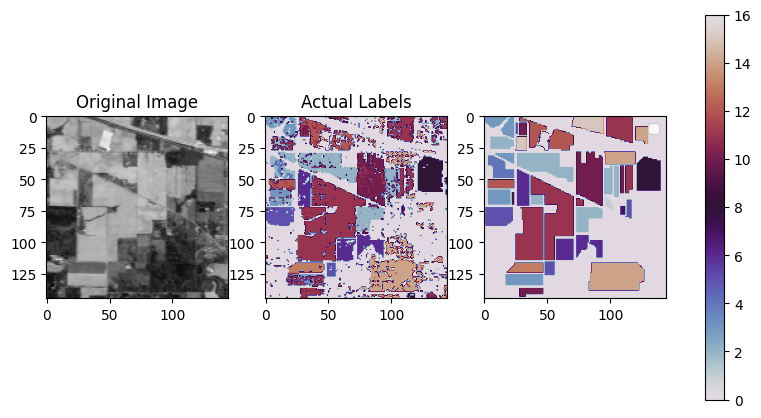

In [31]:
# # reshape y_pred to match the shape of the original image
# y_pred_2d = np.reshape(y_pred, (145,145))

# # display the predicted labels as a 2D image

# im = plt.imshow(y_pred_2d,cmap = 'twilight')
# cbar = plt.colorbar(im)
# plt.show()

# reshape y_pred to match the shape of the original image
y_pred_2d = np.reshape(y_pred, (145,145))

# # display the original image and the predicted labels side by side
# fig, axs = plt.subplots(1, 2, figsize=(10, 5),num=1)

plt.figure(1)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# rest of the code for creating subplots and displaying images


# display the original image
axs[0].imshow(data.reshape(145,145,30)[:,:,0], cmap='gray')
axs[0].set_title('Original Image')

# display the predicted labels as a 2D image
im = axs[1].imshow(y_pred_2d, cmap='twilight')
axs[1].set_title('Predicted Labels')
cbar = fig.colorbar(im, ax=axs.ravel().tolist())

im = axs[2].imshow(actual_labels, cmap='twilight')
axs[1].set_title('Actual Labels')
# cbar = fig.colorbar(im, ax=axs.ravel().tolist())

plt.legend(label_cols)
plt.show()
